In [77]:
# Establishing a connection for MYSQL
import pymysql
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

try:
    #Establish the connection
    conn= pymysql.connect(
        host='127.0.0.1',
        user='root',
        password='king',
        port=3306
    )

    #load data into Dataframe

    query="SELECT * FROM titanic.titanic"
    df=pd.read_sql(query,conn)

    #Display the results
    print('connection successful.Here is your data :')
    display(df.head())
    display(df.info())
    print("Missing Values:")
    display(df.isnull().sum())

except pymysql.error as e:
    print(f"MySQL Error: {e}")

finally:
    if 'conn' in locals():
        conn.close()
        print('connection closed successfully !!!')

connection successful.Here is your data :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    int64  
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        714 non-null    object 
 11  Embarked     714 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 67.1+ KB


None

Missing Values:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

connection closed successfully !!!


In [78]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [79]:
#EDA

In [80]:
# Provides an overview of the dataset including mean, min, max, and quartiles.
#Basic Statistical Summary
print("Statistical Summary:")
display(df.describe())

Statistical Summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.712885,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.529273,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.250000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [81]:
import pandas as pd

# Sample load
# df = pd.read_csv('titanic.csv')

# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify titles
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Create FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create IsAlone
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Fill missing Age if needed (you can use median or other imputation)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Create AgeBand
df['AgeBand'] = pd.cut(df['Age'], bins=[0, 12, 18, 60, 120], labels=['Child', 'Teen', 'Adult', 'Senior'])

# View transformed data
display(df[['Name', 'Title', 'FamilySize', 'IsAlone', 'Age', 'AgeBand']].head())


,Name,Title,FamilySize,IsAlone,Age,AgeBand
0,"Braund, Mr. Owen Harris",Mr,2,0,22,Adult
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,2,0,38,Adult
2,"Heikkinen, Miss. Laina",Miss,1,1,26,Adult
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,2,0,35,Adult
4,"Allen, Mr. William Henry",Mr,1,1,35,Adult


In [82]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  714 non-null    int64   
 1   Survived     714 non-null    int64   
 2   Pclass       714 non-null    int64   
 3   Name         714 non-null    object  
 4   Sex          714 non-null    object  
 5   Age          714 non-null    int64   
 6   SibSp        714 non-null    int64   
 7   Parch        714 non-null    int64   
 8   Ticket       714 non-null    object  
 9   Fare         714 non-null    float64 
 10  Cabin        714 non-null    object  
 11  Embarked     714 non-null    object  
 12  Title        714 non-null    object  
 13  FamilySize   714 non-null    int64   
 14  IsAlone      714 non-null    int64   
 15  AgeBand      713 non-null    category
dtypes: category(1), float64(1), int64(8), object(6)
memory usage: 84.7+ KB


None

In [83]:
display(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
IsAlone        0
AgeBand        1
dtype: int64

In [ ]:
# Handle Missing Values
'''
AgeBand with 1 missing value (probably due to missing or extreme Age)
Confirm if any other columns (like Cabin, Embarked) have missing values.
Fill or drop missing values:
'''

In [84]:
df['AgeBand'] = df['AgeBand'].cat.add_categories('Unknown').fillna('Unknown')
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)  # optional: extract cabin letter later

In [ ]:
#Feature Engineering Enhancements
#a) Extracting Deck from Cabin

In [85]:
df['Deck'] = df['Cabin'].str[0]  # First letter represents deck

In [ ]:
#b) Fare per Pclass

In [86]:
df['FarePerClass'] = df['Fare'] / df['Pclass']

In [ ]:
#c) One-Hot Encoding

In [ ]:
#df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title', 'Deck'], drop_first=True)

In [ ]:
#Explore Target Correlations
#Use groupby() and mean() to understand relationships:

In [87]:
display(df.groupby('Sex')['Survived'].mean())
display(df.groupby('Pclass')['Survived'].mean())
display(df.groupby('Title')['Survived'].mean())
display(df.groupby('AgeBand')['Survived'].mean())
display(df.groupby('IsAlone')['Survived'].mean())

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64

Title
Master    0.583333
Miss      0.724832
Mr        0.168342
Mrs       0.788991
Rare      0.363636
Name: Survived, dtype: float64

AgeBand
Child      0.573529
Teen       0.428571
Adult      0.388788
Senior     0.227273
Unknown    1.000000
Name: Survived, dtype: float64

IsAlone
0    0.516129
1    0.321782
Name: Survived, dtype: float64

In [ ]:
#Visulalize

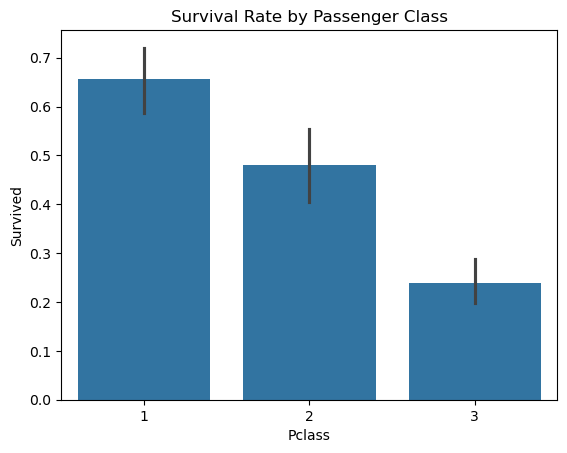

In [88]:
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title("Survival Rate by Passenger Class")
plt.show()

In [ ]:
#Feature Encoding (for ML)
#Convert categorical columns into numerical using Label Encoding or One-Hot Encoding.

In [89]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Title', 'Embarked', 'AgeBand','Deck'], drop_first=True)

In [ ]:
#Drop Unused or Redundant Columns
#Drop columns that won’t help model prediction (e.g., IDs or raw text fields).

In [90]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
#Final Dataset Check
#Confirm all features are numeric and ready for modeling.

In [91]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         714 non-null    int64  
 1   Pclass           714 non-null    int64  
 2   Sex              714 non-null    int64  
 3   Age              714 non-null    int64  
 4   SibSp            714 non-null    int64  
 5   Parch            714 non-null    int64  
 6   Fare             714 non-null    float64
 7   FamilySize       714 non-null    int64  
 8   IsAlone          714 non-null    int64  
 9   FarePerClass     714 non-null    float64
 10  Title_Miss       714 non-null    bool   
 11  Title_Mr         714 non-null    bool   
 12  Title_Mrs        714 non-null    bool   
 13  Title_Rare       714 non-null    bool   
 14  Embarked_C       714 non-null    bool   
 15  Embarked_Q       714 non-null    bool   
 16  Embarked_S       714 non-null    bool   
 17  AgeBand_Teen    

None

In [ ]:
#Train/Test Split

In [92]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize and train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)

# Evaluation
print("Random Forest Performance:")
print("Accuracy :", accuracy_score(y_test, rf_preds))
print("Precision:", precision_score(y_test, rf_preds))
print("Recall   :", recall_score(y_test, rf_preds))
print("F1 Score :", f1_score(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))


Random Forest Performance:
Accuracy : 0.7902097902097902
Precision: 0.75
Recall   : 0.6964285714285714
F1 Score : 0.7222222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        87
           1       0.75      0.70      0.72        56

    accuracy                           0.79       143
   macro avg       0.78      0.77      0.78       143
weighted avg       0.79      0.79      0.79       143



In [94]:
from xgboost import XGBClassifier

# Initialize and train
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_preds = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Performance:")
print("Accuracy :", accuracy_score(y_test, xgb_preds))
print("Precision:", precision_score(y_test, xgb_preds))
print("Recall   :", recall_score(y_test, xgb_preds))
print("F1 Score :", f1_score(y_test, xgb_preds))
print("\nClassification Report:\n", classification_report(y_test, xgb_preds))


XGBoost Performance:
Accuracy : 0.8181818181818182
Precision: 0.8
Recall   : 0.7142857142857143
F1 Score : 0.7547169811320755

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        87
           1       0.80      0.71      0.75        56

    accuracy                           0.82       143
   macro avg       0.81      0.80      0.81       143
weighted avg       0.82      0.82      0.82       143



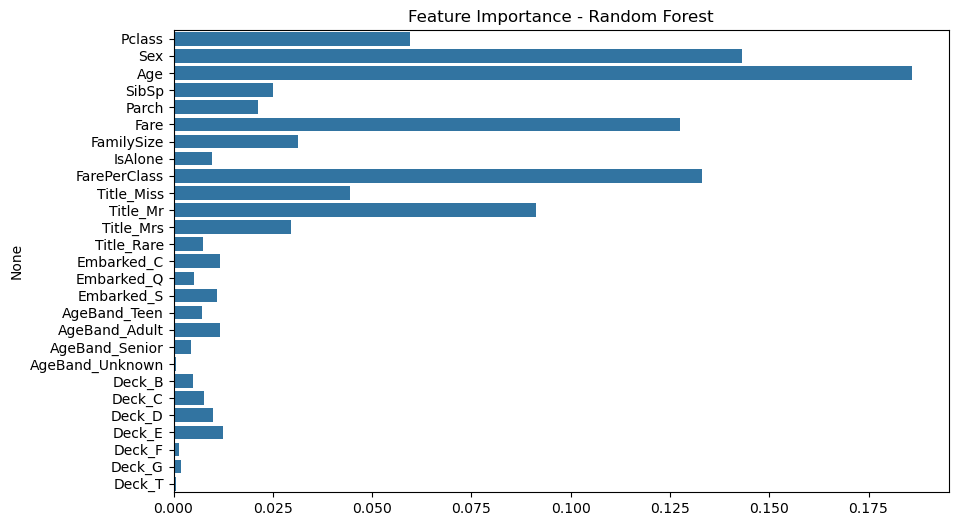

In [95]:
import matplotlib.pyplot as plt

# Feature Importance from Random Forest
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()

In [ ]:
#Hyperparameter Tuning (Random Forest Example using GridSearchCV)

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Random Forest Parameters:", grid_search.best_params_)

Best Random Forest Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
#Cross Validation (Stratified K-Fold)

In [97]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(best_rf, X, y, cv=skf, scoring='accuracy')

print("Stratified K-Fold Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Stratified K-Fold Accuracy Scores: [0.83216783 0.83216783 0.81818182 0.81818182 0.85915493]
Mean CV Accuracy: 0.8319708460553532


In [ ]:
#Handling Class Imbalance
#a) Using class_weight='balanced' in Random Forest

In [98]:
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
#b) Using SMOTE

In [ ]:
#Step 1: Apply SMOTE on training data

In [99]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [ ]:
 #Step 2: Train your model using resampled data

In [100]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)
model.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#Step 3: Predict using original test data (do not apply SMOTE on test)

In [101]:
y_pred = model.predict(X_test) 

In [ ]:
#Step 4: Evaluate the performance

In [102]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7762237762237763
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        87
           1       0.73      0.68      0.70        56

    accuracy                           0.78       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.78      0.77       143

Confusion Matrix:
 [[73 14]
 [18 38]]


In [104]:
'''
#model Evaluation
#from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

# Model Evaluation on training data
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred,average='macro'), 3))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred,average='macro'), 3))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred,average='macro'), 3))

# Model Evaluation on testing data
print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_pred), 3))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_pred,average='macro'), 3))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_pred,average='macro'), 3))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_pred,average='macro'), 3))
'''

"\n#model Evaluation\n#from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score\n\n# Model Evaluation on training data\nprint('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 3))\nprint('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred,average='macro'), 3))\nprint('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred,average='macro'), 3))\nprint('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred,average='macro'), 3))\n\n# Model Evaluation on testing data\nprint('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_pred), 3))\nprint('Testing Precision :', np.round(metrics.precision_score(y_test, y_pred,average='macro'), 3))\nprint('Testing Recall :', np.round(metrics.recall_score(y_test, y_pred,average='macro'), 3))\nprint('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_pred,average='macro'), 3))\n"

In [103]:
# Save the model (Logistics Classifier())
with open('titanic_classifier.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [105]:
print(model.feature_names_in_)

['Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'FamilySize' 'IsAlone'
 'FarePerClass' 'Title_Miss' 'Title_Mr' 'Title_Mrs' 'Title_Rare'
 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'AgeBand_Teen' 'AgeBand_Adult'
 'AgeBand_Senior' 'AgeBand_Unknown' 'Deck_B' 'Deck_C' 'Deck_D' 'Deck_E'
 'Deck_F' 'Deck_G' 'Deck_T']


In [159]:
import pickle
import pandas as pd

# Load the model
with open('iris_classifier_new.pkl', 'rb') as f:
    model = pickle.load(f)

# Check model classes (to confirm the order)
print("Model classes:", model.classes_)


Model classes: [0 1 2]


In [160]:
# Test data: [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]
test_inputs = [
    {"SepalLengthCm": 5.1, "SepalWidthCm": 3.5, "PetalLengthCm": 1.4, "PetalWidthCm": 0.2},  # Setosa
    {"SepalLengthCm": 6.0, "SepalWidthCm": 2.2, "PetalLengthCm": 4.0, "PetalWidthCm": 1.0},  # Versicolor
    {"SepalLengthCm": 6.9, "SepalWidthCm": 3.1, "PetalLengthCm": 5.4, "PetalWidthCm": 2.1},  # Virginica
    {"SepalLengthCm": 4.3, "SepalWidthCm": 2.0, "PetalLengthCm": 3.0, "PetalWidthCm": 1.0},  
]

# Predict for each sample
for i, sample in enumerate(test_inputs):
    df = pd.DataFrame([sample])
    pred_index = model.predict(df)[0]
    predicted_species = model.classes_[pred_index]
    print(f"Sample {i+1}: Predicted → {predicted_species}")


Sample 1: Predicted → 0
Sample 2: Predicted → 1
Sample 3: Predicted → 2
Sample 4: Predicted → 1
